# Explicación de concepto de separación lineal

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ja.meza@profesor.duoc.cl

**Fecha de Creación:** Octubre de 2025  
**Versión:** 1.1  

**Fecha de Creación:** Enero de 2025  
**Versión:** 1.0  




---

## Descripción

Este notebook contiene la explicación del concepto de separación lineal de los datos que es clave para decidir si se usa SVM lineal o no lineal para un problema de clasificación.

Se ofrecen alternativas para comprobar la separación lineal:

+ Comprobación visual
+ Comprobación matemática
+ Uso de métrica de separación de clases

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.12. A continuación se listan las bibliotecas necesarias:

- pandas (>=1.1.0)
- numpy (1.26.4)
- matplotlib (3.7.1)
- seaborn (0.13.1)
- sklearn

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```python
import pandas as pd
print(pd.__version__)
````

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator
from typing import Union
from collections import Counter

from sklearn.datasets import make_blobs, make_circles
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, silhouette_score

# Conjunto de datos separable

In [2]:
# Generar datos artificiales
X, y = make_blobs(n_samples=100, centers=2, random_state=29, cluster_std=1.2)

In [3]:
y

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1])

In [4]:
# Contar frecuencias
frecuencias = Counter(y)
print(frecuencias)

Counter({np.int64(1): 50, np.int64(0): 50})


In [5]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29, stratify=y)

# Crear un modelo SVM lineal
svm_lineal = SVC(kernel='linear', random_state=29)
svm_lineal.fit(X_train, y_train)

# Predicciones
y_pred = svm_lineal.predict(X_test)

## Comprobación visual

In [6]:
def plot_data(X : np.array, y : np.array, title="Distribución de los datos") -> None:
  """
  Genera gráfico para ver la distribución de los datos

  Parámetros:
  ----------
  - X: Matriz de características
  - y: Etiquetas de clase
  - title: Título del gráfico

  Retorna:
  --------
  - None
  """
  plt.figure(figsize=(8, 6))
  for label in np.unique(y):
    plt.scatter(X[y == label, 0], X[y == label, 1], label=f"Clase {label}", alpha=0.8)
  plt.title(title, fontsize=14, fontweight="bold")
  plt.xlabel("Feature 1", fontsize=12, fontweight="bold")
  plt.ylabel("Feature 2", fontsize=12, fontweight="bold")
  plt.legend()
  plt.show()

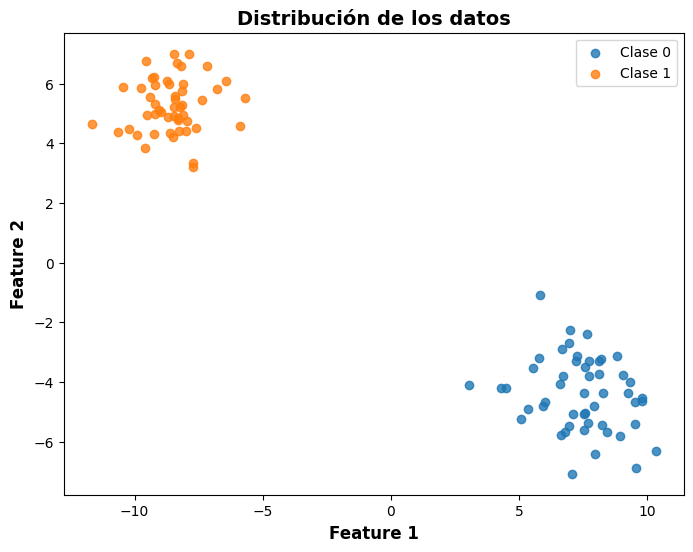

In [7]:
# Gráfica de la distribución
plot_data(X, y)

## Comprobación matemática

In [8]:
# Predicciones en el conjunto de entrenamiento
y_pred = svm_lineal.predict(X)
accuracy = accuracy_score(y, y_pred)

print(f"Accuracy en entrenamiento con SVM lineal: {accuracy:.2f}")
if accuracy == 1.0:
    print("Los datos son linealmente separables.")
else:
    print("Los datos NO son linealmente separables.")

Accuracy en entrenamiento con SVM lineal: 1.00
Los datos son linealmente separables.


## Comprobación usando la separación entre clases

Se usa el índice de silhouttte.

Aunque se usa comúnmente para clustering, puede dar una idea de cómo están separadas las clases en el espacio.

Un valor cercano a 1 indican buena separación de clases y cercano a 0 sugiere solapamiento.

In [9]:
silhouette_avg = silhouette_score(X, y)
print(f"Índice de Silhouette: {silhouette_avg : .4f}")

Índice de Silhouette:  0.8852


## Visualiza frontera de decisión

In [10]:
def plot_decision_boundary(X : np.array, y : Union[np.ndarray, list],
                           modelo : BaseEstimator, title="Frontera de decisión") -> None:
  """
  Genera gráfico para ver la frontera de decisión

  Parámetros:
  ----------
  - X: Matriz de características
  - y: Etiquetas de clase
  - modelo: Modelo de clasificación
  - title: Título del gráfico

  Retorna:
  --------
  - None
  """
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

  Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.figure(figsize=(8, 6))
  plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k", cmap=plt.cm.coolwarm)
  plt.title(title, fontsize=14, fontweight="bold")
  plt.xlabel("Feature 1", fontsize=12, fontweight="bold")
  plt.ylabel("Feature 2", fontsize=12, fontweight="bold")
  plt.show()

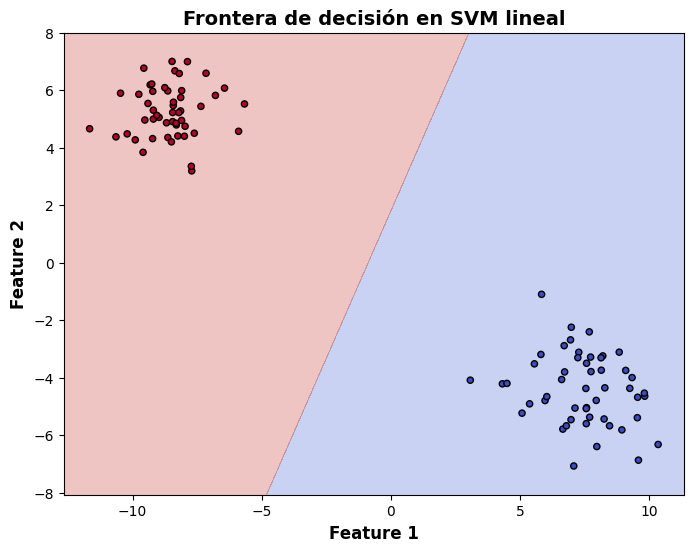

In [11]:
# Graficar la frontera de decisión
plot_decision_boundary(X, y, svm_lineal, title="Frontera de decisión en SVM lineal")

In [12]:
# Coeficientes del hiperplano
print("Coeficientes del modelo lineal:", svm_lineal.coef_)
print("Intersección:", svm_lineal.intercept_)


Coeficientes del modelo lineal: [[-0.13804995  0.067242  ]]
Intersección: [-0.12161589]


# Conjunto de datos NO separable

## Comprobación visual

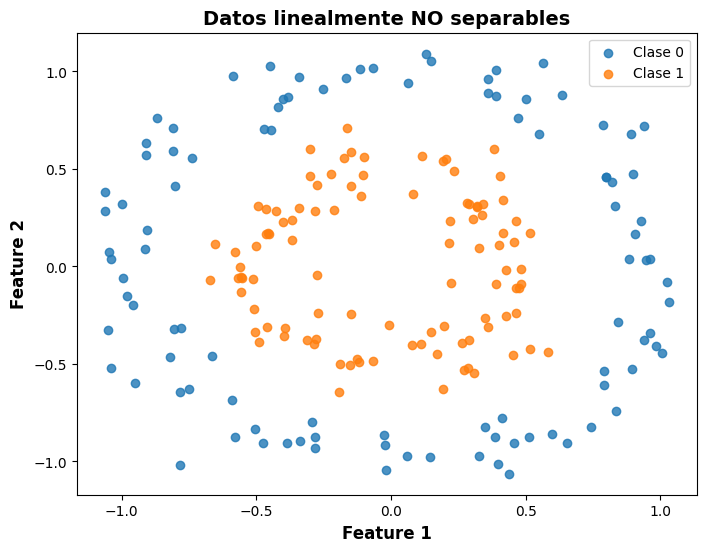

In [13]:
# Datos no linealmente separables
X_no_separable, y_no_separable = make_circles(n_samples=200, factor=0.5, noise=0.1, random_state=29)
plot_data(X_no_separable, y_no_separable, title="Datos linealmente NO separables")

In [14]:
# Contar frecuencias
frecuencias = Counter(y_no_separable)
print(frecuencias)

Counter({np.int64(1): 100, np.int64(0): 100})


## Comprobación usando distancia entre clases

In [15]:
silhouette_avg = silhouette_score(X_no_separable, y_no_separable)
print(f"Índice de Silhouette: {silhouette_avg : .4f}")

Índice de Silhouette:  0.1046


In [17]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(X_no_separable, y_no_separable,
                                                                test_size=0.2, random_state=29)

# Crear un modelo SVM NO lineal
svm_no_lineal = SVC(kernel='rbf', random_state=29)
svm_no_lineal.fit(X_train_ns, y_train_ns)

# Predicciones
y_pred = svm_no_lineal.predict(X_test_ns)

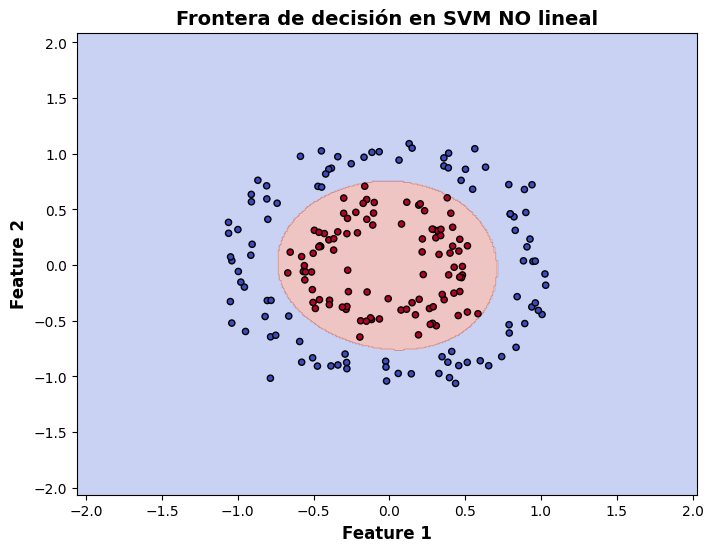

In [18]:
# Graficar la frontera de decisión
plot_decision_boundary(X_no_separable, y_no_separable, svm_no_lineal,
                       title="Frontera de decisión en SVM NO lineal")

# Comentarios

+ Al utilizar el kernel RBF (Radial Basis Function) se está aplicando `SVM NO lineal`.

+ El kernel RBF transforma los datos originales en un espacio de mayor dimensión, donde es más problable encontrar una separación lineal entre la clases, este proceso se conoce con el nombre de **"truco del kernel"**

# Support Vector Machine para clasificación

+ SVM tiene como objetivo encontrar un hiperplano en un espacio de características que mejor separa las clases.

+ *La clasificación lineal con SVM* trata de encontrar un hiperplano que maximice el margen entre las clases en un espacio de características lineales.

+ El **`hiperplano`** es la frontera de decisión que separa las clases.

+ *La clasificación NO lineal con SVM* implica la transformación de las características de entrada a un espacio de mayor dimensión donde las clases sean linealmente separables. Esta tarea es la que realizan las funciones de kernel.


---

# Elección entre SVM Lineal y NO Lineal

Depende de:
+ Linealidad de los datos
+ Complejidad del problema (reconocimiento de imágenes: SVM No lineal)
+ Dimensionalidad de los datos
+ Regularización y ajuste de parámetros
+ Tamaño del conjunto de datoe